<a href="https://colab.research.google.com/github/julioloch/pratica-data-cience-desco/blob/main/Aula_6_PeR_Julio_Loch_Pratica_integradora_de_ci%C3%AAncia_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Pensar & Responder**
##*Prática Integradora de Ciência de Dados*
###*Aula 06 - Machine Learning para Antecipação de Cenários*
Julio Loch | RA: 2226522

O problema consiste em construir um modelo de aprendizado de máquina para classificar automaticamente os tipos de vinho (tinto ou branco) com base em dados fornecidos pela empresa (no caso o arquivo **[wine_dataset.csv](https://www.kaggle.com/datasets/dell4010/wine-dataset)** baixado pelo kaggle), utilizando o algoritmo GaussianNB.


O **Gaussian Naive Bayes (GaussianNB)** é um algoritmo de classificação baseado no Teorema de Bayes com a suposição de independência entre os recursos. É comumente usado em problemas de classificação, especialmente quando os recursos têm distribuição normal (gaussiana).

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

Acessando o arquivo e exibindo as 5 primeiras linhas

In [30]:
url = 'https://raw.githubusercontent.com/julioloch/pratica-data-cience-desco/main/wine_dataset.csv'
df = pd.read_csv(url)
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [31]:
df.describe().round(1)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.0,6497.0,6497.0,6497.0,6497.0,6497.0,6497.0,6497.0,6497.0,6497.0,6497.0,6497.0
mean,7.2,0.3,0.3,5.4,0.1,30.5,115.7,1.0,3.2,0.5,10.5,5.8
std,1.3,0.2,0.1,4.8,0.0,17.7,56.5,0.0,0.2,0.1,1.2,0.9
min,3.8,0.1,0.0,0.6,0.0,1.0,6.0,1.0,2.7,0.2,8.0,3.0
25%,6.4,0.2,0.2,1.8,0.0,17.0,77.0,1.0,3.1,0.4,9.5,5.0
50%,7.0,0.3,0.3,3.0,0.0,29.0,118.0,1.0,3.2,0.5,10.3,6.0
75%,7.7,0.4,0.4,8.1,0.1,41.0,156.0,1.0,3.3,0.6,11.3,6.0
max,15.9,1.6,1.7,65.8,0.6,289.0,440.0,1.0,4.0,2.0,14.9,9.0


#Análise inicial e tratamento dos dados

Listando as colunas e o formato do dataframe

In [11]:
print("Colunas:", "\n")
for i in range(len(df.columns)):
  print (df.columns[i])

print("\n")

print("linhas, colunas:", df.shape)

Colunas: 

fixed_acidity
volatile_acidity
citric_acid
residual_sugar
chlorides
free_sulfur_dioxide
total_sulfur_dioxide
density
pH
sulphates
alcohol
quality
style


linhas, colunas: (6497, 13)


Conferindo se há valores faltantes

In [12]:
df.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
style                   0
dtype: int64

Conferindo o tipo de dado de cada coluna

In [13]:
df.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
style                    object
dtype: object

###A coluna "style" descreve o tipo do vinho.

Descreve como "Red" ou "White".
Apenas as variáveis preditoras são numéricas.
A variável alvo (tipo do vinho) não é.

In [14]:
df['style'].head()

0    red
1    red
2    red
3    red
4    red
Name: style, dtype: object

In [15]:
df['style'].tail()

6492    white
6493    white
6494    white
6495    white
6496    white
Name: style, dtype: object

*Se houvessem variáveis preditoras não numéricas seria necessário outro tratamento.*

*Como exemplo o seguinte:*


`df['style'] = df['style'].replace({"red": 1, "white": 0})`

*Isso tornaria a variável 'style' numérica e ainda manteria a classificação corretamente.*

## Explorando as variáveis

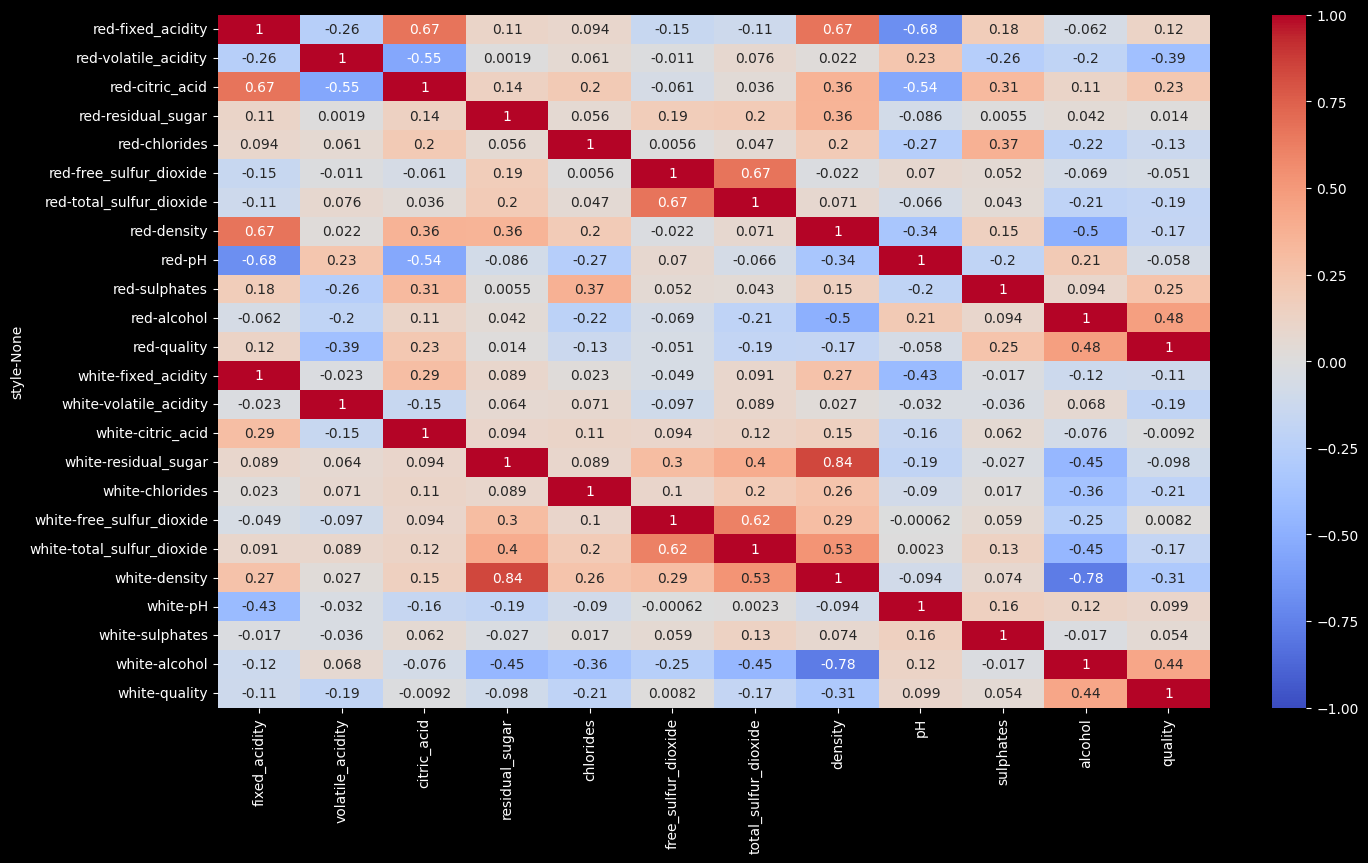

In [60]:
plt.figure(figsize = (16, 9))
sns.heatmap(df.groupby('style').corr(), annot = True, vmin = -1, cmap = "coolwarm")
plt.show()

##Histograma de variáveis / qtd de vinhos

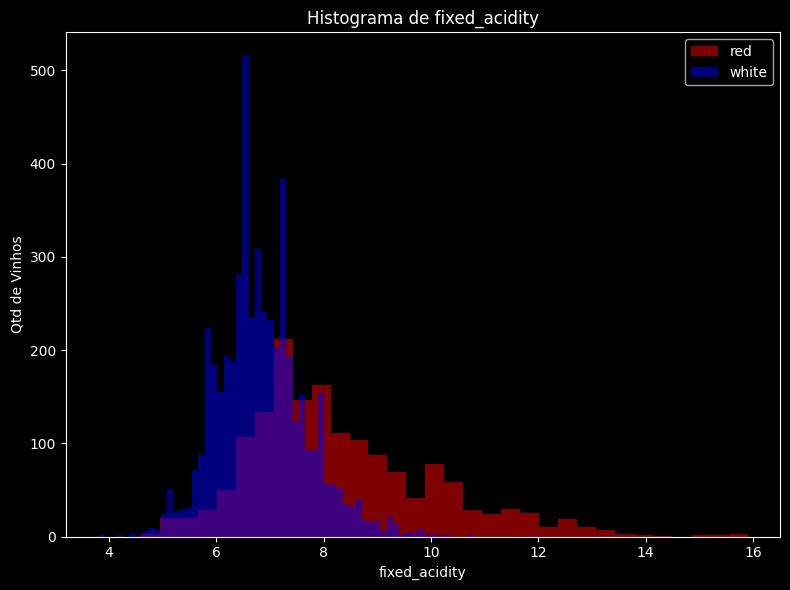

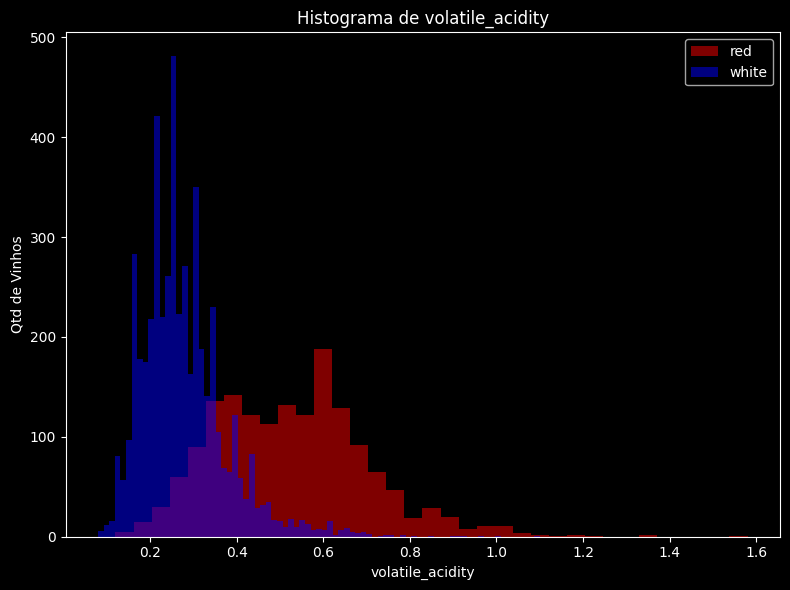

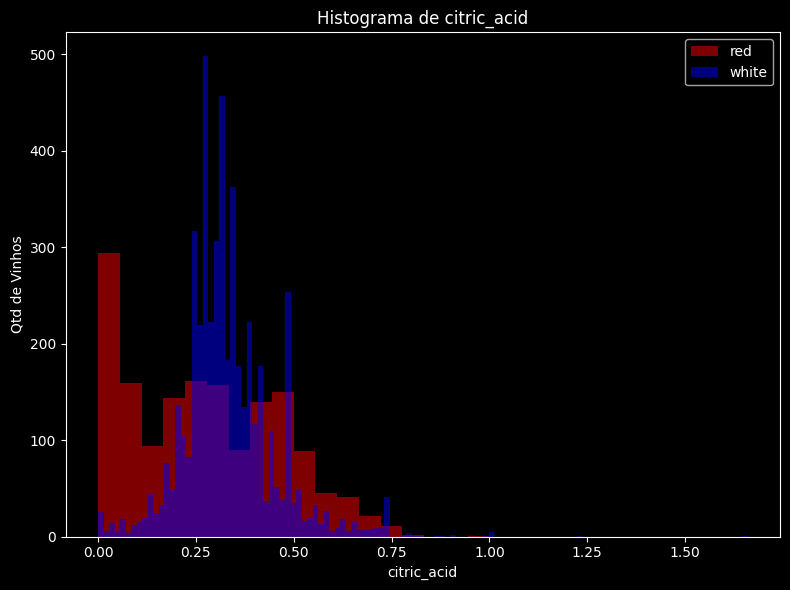

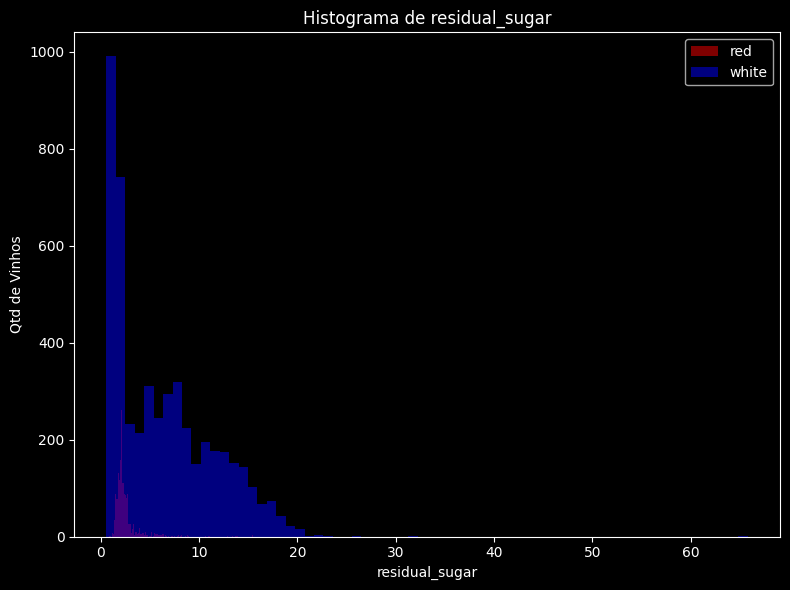

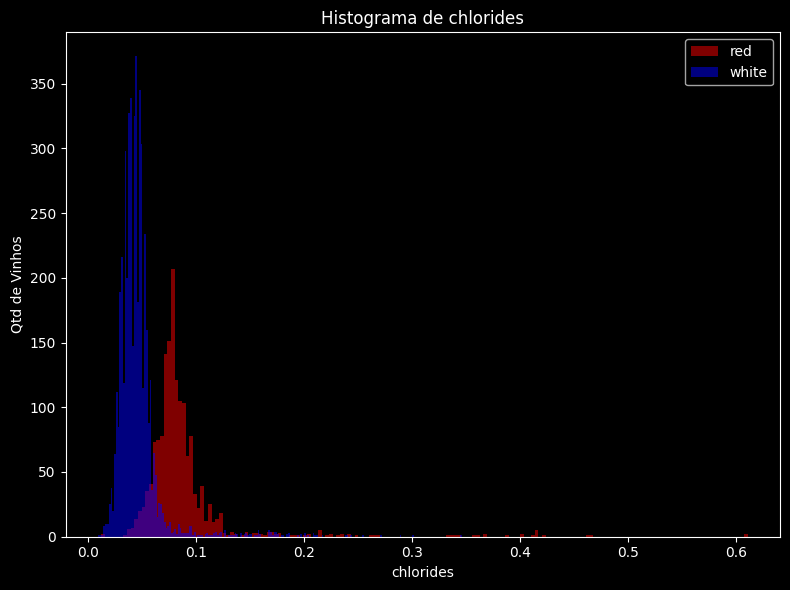

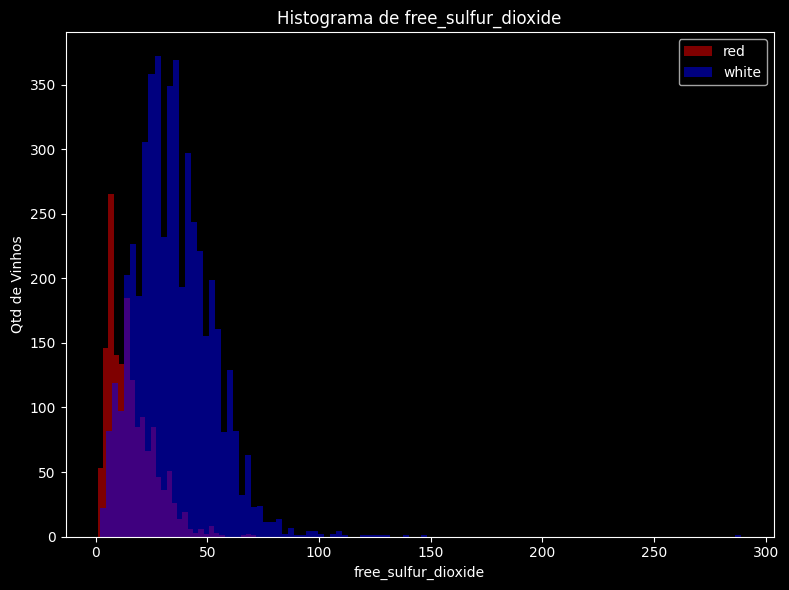

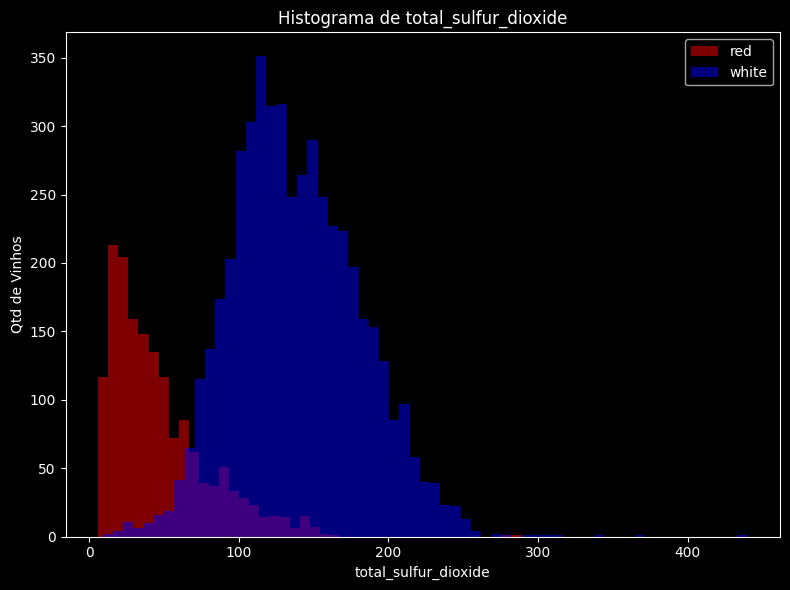

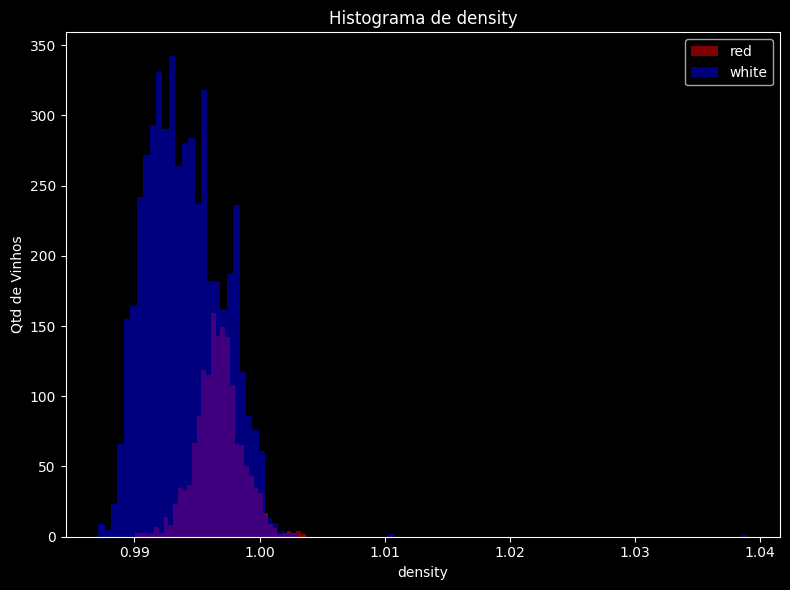

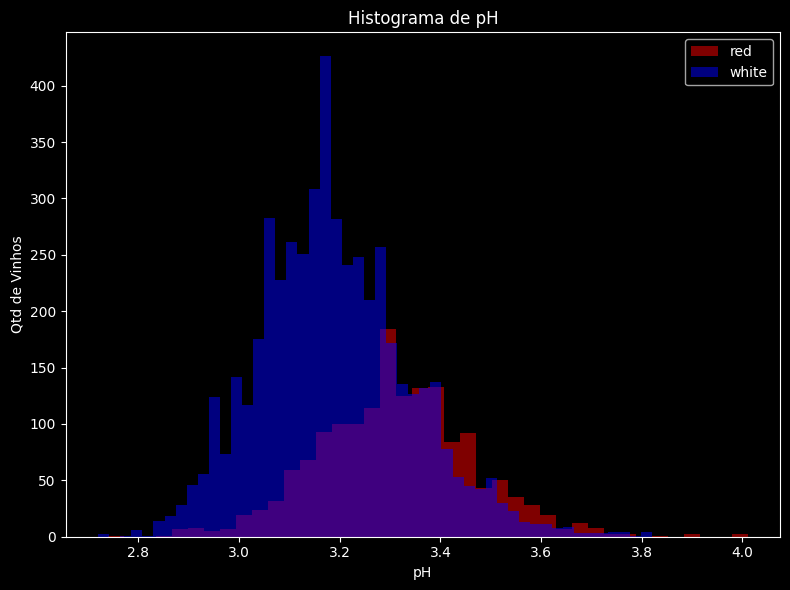

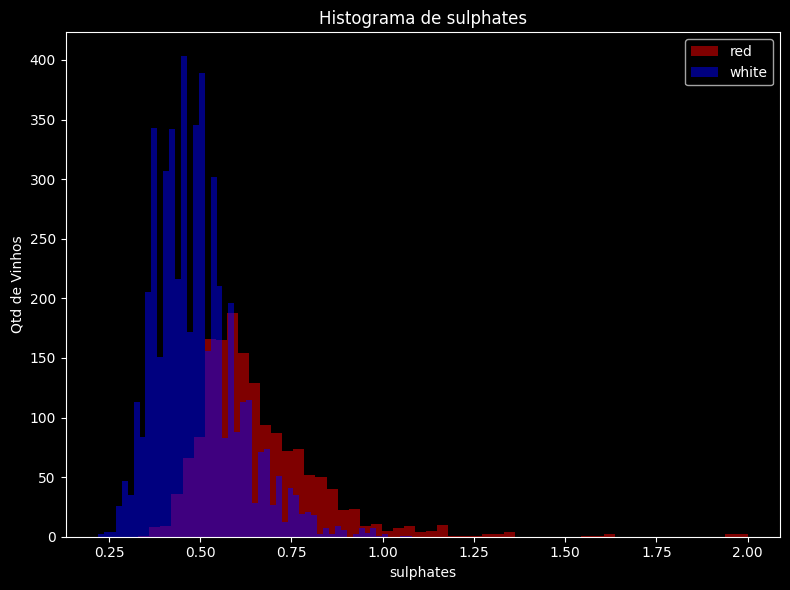

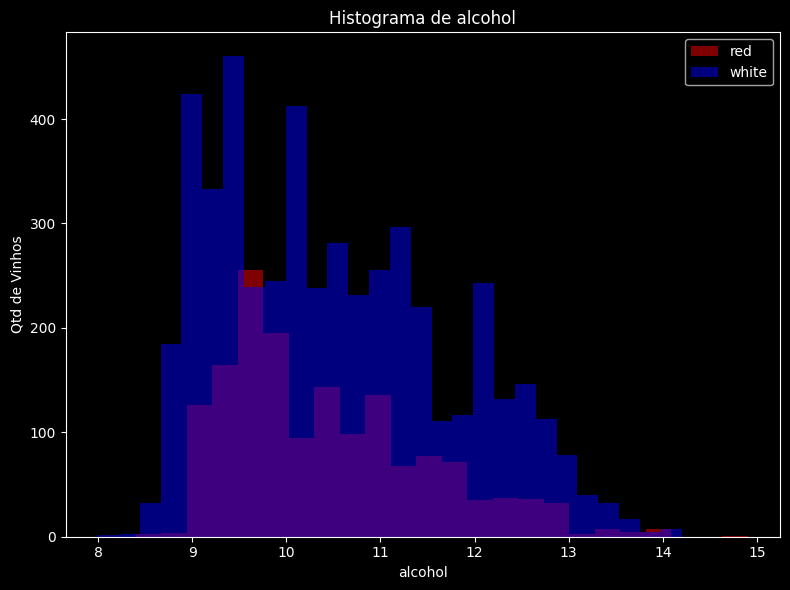

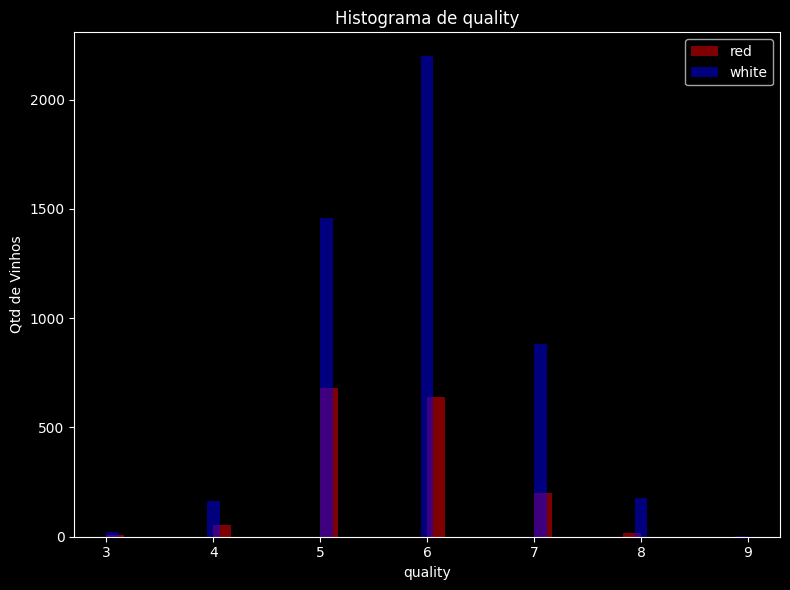

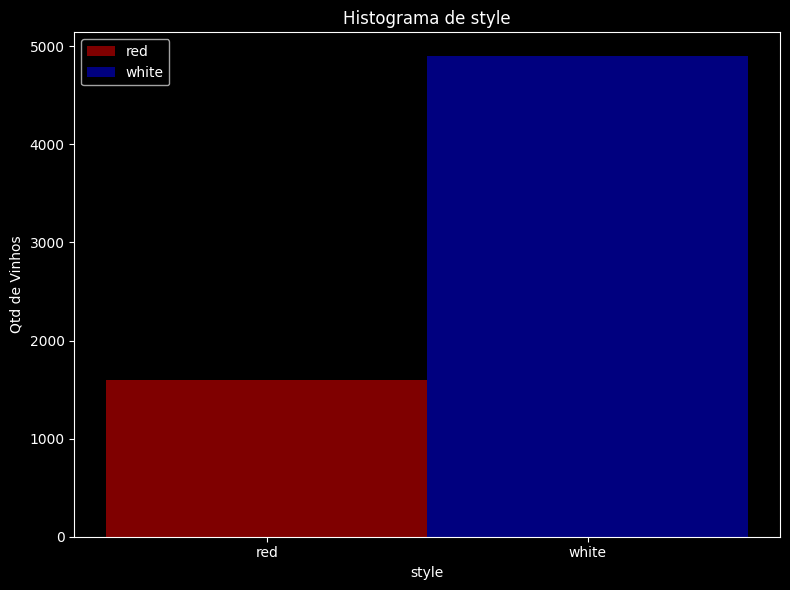

In [93]:
# Criar uma lista de cores para cada tipo de vinho
cores = {'red': 'red', 'white': 'blue'}

# Iterar sobre as colunas do DataFrame
for coluna in df.columns:
    # Criar uma nova figura para cada histograma com tamanho 8x6 polegadas
    plt.figure(figsize=(8, 6))

    # Plotar o histograma da coluna atual com cores separadas por tipo de vinho
    for tipo_vinho, cor in cores.items():
        dados_tipo_vinho = df[df['style'] == tipo_vinho][coluna]
        plt.hist(dados_tipo_vinho, bins = 'auto', color=cor, alpha=0.5, label=tipo_vinho)

    # Adicionar legenda
    plt.legend()


    # Adicionar rótulos aos eixos e título
    plt.xlabel(coluna)
    plt.ylabel('Qtd de Vinhos')
    plt.title('Histograma de ' + coluna)

    # Mostrar o histograma
    plt.tight_layout()
    plt.show()

#Implementação do modelo GaussianNB

Separando variáveis de predição e classificação

In [94]:
y = df['style']
X = df.drop('style', axis  = 1)

Separando dados de teste e treino

In [95]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.3)

Criando modelo e treinando

In [96]:
model = GaussianNB()
model.fit(X_treino, y_treino)

GaussianNB()

Teste de acurácia

In [97]:
model.score(X_teste, y_teste)

0.9676923076923077

Teste de predição

In [104]:
X_teste[300:310]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
92,8.6,0.49,0.29,2.0,0.110,19.0,133.0,0.99720,2.93,1.98,9.8,5
5131,7.2,0.23,0.46,6.4,0.036,17.0,85.0,0.99279,3.10,0.78,11.7,6
2019,7.0,0.22,0.31,2.7,0.030,41.0,136.0,0.98980,3.16,0.37,12.7,7
3369,7.8,0.39,0.26,9.9,0.059,33.0,181.0,0.99550,3.04,0.42,10.9,6
2799,6.8,0.18,0.37,1.5,0.027,37.0,93.0,0.99200,3.30,0.45,10.8,6
3736,7.2,0.16,0.26,7.1,0.054,41.0,224.0,0.99660,3.38,0.55,10.1,5
5769,7.4,0.16,0.30,13.7,0.056,33.0,168.0,0.99825,2.90,0.44,8.7,7
750,8.3,0.65,0.10,2.9,0.089,17.0,40.0,0.99803,3.29,0.55,9.5,5
3131,7.5,0.23,0.49,7.7,0.049,61.0,209.0,0.99410,3.14,0.30,11.1,7
3818,6.5,0.24,0.36,2.2,0.027,36.0,134.0,0.98980,3.28,0.36,12.5,7


In [102]:
model.predict(X_teste[300:310])

array(['red', 'white', 'white', 'white', 'white', 'white', 'white', 'red',
       'white', 'white'], dtype='<U5')

In [103]:
y_teste[300:310]

92        red
5131    white
2019    white
3369    white
2799    white
3736    white
5769    white
750       red
3131    white
3818    white
Name: style, dtype: object

In [110]:
model.predict(X_teste[300:310])

array(['red', 'white', 'white', 'white', 'white', 'white', 'white', 'red',
       'white', 'white'], dtype='<U5')

O resultado acima mostra que apesar da acurácia do modelo ser de 96%, ele conseguiu prever corretamente o tipo do vinho com base nos parâmetros químicos.